In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, os

from sklearn.cluster import KMeans
import seaborn as sns

Load in an image

In [1]:
file_name = "Sentinel-2 image on 2018-01-12.jpg"

In [5]:
ghana_img = plt.imread("../data/ghana_data/"+file_name)

Our image

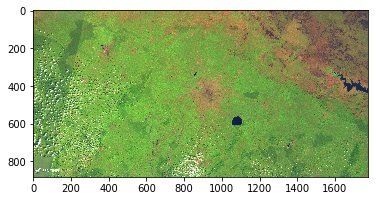

In [39]:
plt.imshow(ghana_img)

In [6]:
ghana_img.shape

(882, 1775, 3)

In [9]:
ghana_img.max()

255

In [10]:
ghana_img.min()

0

Ok, so the image is loaded and the colours range between 255 and 0, we can see the RBG histogram here

In [27]:
np.reshape(ghana_img[:,:,0], -1)

array([148, 117, 118, ...,  96, 104, 112], dtype=uint8)

/home/eddr/.local/share/virtualenvs/bristol_data_dive-ag7wqzNB/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


AttributeError: module 'seaborn' has no attribute 'plt'

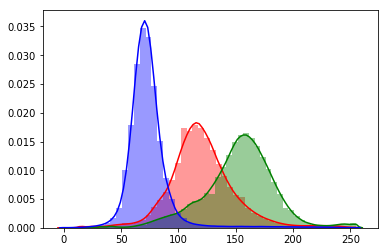

In [32]:
sns.distplot(np.reshape(ghana_img[:,:,0], -1), color = "red", label = "Red")
sns.distplot(np.reshape(ghana_img[:,:,1], -1), color = "green", label = "Green")
sns.distplot(np.reshape(ghana_img[:,:,2], -1), color = "blue", label = "Blue")

So what this tells us is that the green levels are the highest and blue the lowest, so there is a difference between the colour levels we might be able to exploit

/home/eddr/.local/share/virtualenvs/bristol_data_dive-ag7wqzNB/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


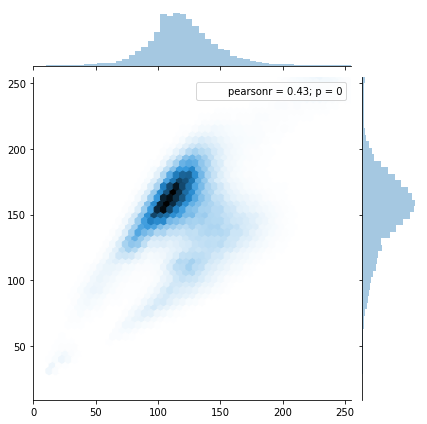

In [35]:
sns.jointplot(np.reshape(ghana_img[:,:,0], -1),
              np.reshape(ghana_img[:,:,1], -1),
             kind = "hex")
plt.show()

/home/eddr/.local/share/virtualenvs/bristol_data_dive-ag7wqzNB/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


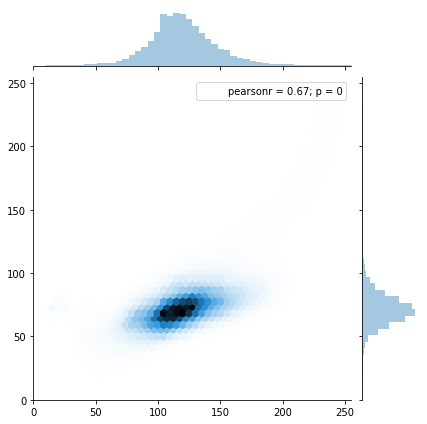

In [37]:
sns.jointplot(np.reshape(ghana_img[:,:,0], -1),
              np.reshape(ghana_img[:,:,2], -1),
             kind = "hex")

plt.show()

/home/eddr/.local/share/virtualenvs/bristol_data_dive-ag7wqzNB/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


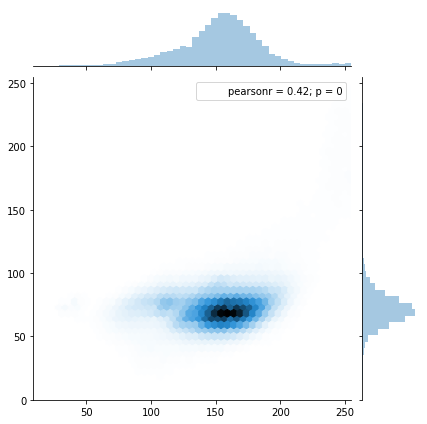

In [38]:
sns.jointplot(np.reshape(ghana_img[:,:,1], -1),
              np.reshape(ghana_img[:,:,2], -1),
             kind = "hex")

plt.show()

In [44]:
ghana_img[:,:,0].size

1565550

Data munging

In [48]:
dims = dims = np.shape(ghana_img)
img_matrix = np.reshape(ghana_img, (dims[0] * dims[1], dims[2]))

Lets try a cluster

In [58]:
cl_3 = KMeans(n_clusters = 3)

In [59]:
img_3_groups = cl_3.fit_predict(img_matrix)

In [53]:
cluster_img = np.reshape(img_3_groups, (dims[0], dims[1]))

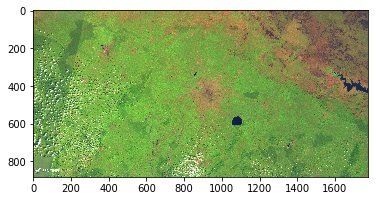

In [56]:
plt.imshow(ghana_img)

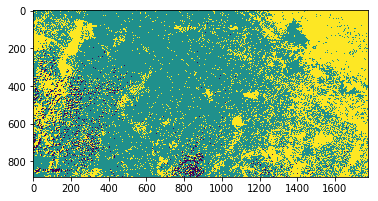

In [57]:
plt.imshow(cluster_img)

looks like we have clouds an things that aren't green! Not *that* useful, we can try with more groups

In [60]:
cl_5 = KMeans(n_clusters = 5)

In [ ]:
img_3_groups = cl_3.fit_predict(img_matrix)